In [1]:
%pip install numpy scikit-learn matpotlib seaborn tenserflow tenserflow_datasets

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matpotlib (from versions: none)
ERROR: No matching distribution found for matpotlib


In [2]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import os
os.environ['TFDS_DISABLE_SSL_VERIFICATION'] = '1'

dataset, dataset_info = tfds.load("malaria", with_info=True, as_supervised=True, shuffle_files=False, split=['train'])

In [5]:
for data in dataset[0].take(1):
        print(data)

(<tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [6]:
def split(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):
    DATASET_SIZE = len(dataset)
    
    train_data = dataset.take(int(DATASET_SIZE * TRAIN_RATIO))
    
    val_data = dataset.skip(int(DATASET_SIZE * TRAIN_RATIO))
    val_data = val_data.take(int(DATASET_SIZE * VAL_RATIO))
    test_data = val_data.skip(int(DATASET_SIZE * VAL_RATIO))

    return train_data, val_data, test_data

### Making,Training,Evaluating our model

In [7]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

DATASET = tf.data.Dataset.range(10)
print(list(DATASET.as_numpy_iterator()))

Data_size = len(DATASET)
print(Data_size)

train_data = DATASET.take(int(Data_size * TRAIN_RATIO))
print(list(train_data.as_numpy_iterator()))

val_data = DATASET.skip(int(Data_size * TRAIN_RATIO))
val_data = val_data.take(int(Data_size * VAL_RATIO))
print(list(val_data.as_numpy_iterator()))

test_data = val_data.skip(int(Data_size * VAL_RATIO))
print(list(test_data.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]
10
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
[np.int64(8)]
[]


In [8]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [9]:
train_data, val_data, test_data = split(dataset[0], TRAIN_RATIO, VAL_RATIO, TEST_RATIO)
print(list(train_data.take(1).as_numpy_iterator()),
      list(val_data.take(1).as_numpy_iterator()), list(test_data.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

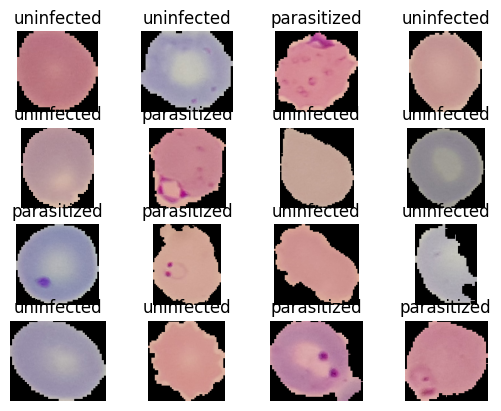

In [10]:
for i,(image,label) in enumerate(train_data.take(16)):
    ax = plt.subplot(4, 4,i + 1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label.numpy()))
    plt.axis("off")
plt.show()

In [11]:
def preprocess(image, label):
    image = tf.image.resize(image, [64, 64])    # → 64×64 now
    image = tf.cast(image, tf.float32) / 255.0  # → [0,1]
    return image, label

train_ds = train_data.map(preprocess) \
                   .shuffle(1000) \
                   .batch(32) \
                   .prefetch(tf.data.AUTOTUNE)

val_ds = val_data.map(preprocess) \
                 .batch(32) \
                 .prefetch(tf.data.AUTOTUNE)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, 5, activation="relu"),   # will see (32,64,64,3) tensors
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 5, activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(84, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax"),
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.fit(train_ds, epochs=50, validation_data=val_ds,verbose=1)

Epoch 1/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9989 - loss: 0.0032 - val_accuracy: 0.9495 - val_loss: 0.4339
Epoch 2/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9978 - loss: 0.0061 - val_accuracy: 0.9525 - val_loss: 0.4469
Epoch 3/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9979 - loss: 0.0059 - val_accuracy: 0.9466 - val_loss: 0.4740
Epoch 4/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9470 - val_loss: 0.3854
Epoch 5/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9987 - loss: 0.0031 - val_accuracy: 0.9495 - val_loss: 0.4985
Epoch 6/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9456 - val_loss: 0.4875
Epoch 7/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9966 - loss: 0.0119 - val_accuracy: 0.9474 - val_loss: 0.4510
Epoch 8/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accu

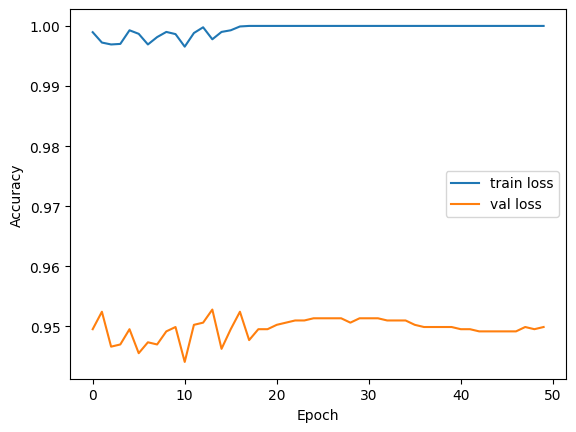

In [14]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["train loss","val loss"])
plt.show()

In [15]:
model.evaluate(val_ds, verbose=1)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9546 - loss: 0.9638


[1.0499343872070312, 0.9499092698097229]

In [16]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 932.9 kB/s eta 0:00:42
    --------------------------------------- 0.8/39.5 MB 932.9 kB/s eta 0:00:42
    --------------------------------------- 0.8/39.5 MB 932.9 kB/s eta 0:00:42
   - -------------------------------------- 1.0/39.5 MB 986.7 kB/s eta 0:00:39
   - -------------------------------------- 1.3/39.5 MB 1.0 MB/s eta 0:00:37
   - -------------------------------------- 1.6/39.5 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.6/39.5 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.8/39.5 MB 958.5 kB/s eta 0:00:40
   - -------------------------------------- 1.8/39.5 MB 958.5 kB/s eta 0:00:40
   -- ------------------------------------- 2.1/39.5 MB 827.0 kB/s eta 0:00:46
   -- 

### Testing the model on a image that it didn't see

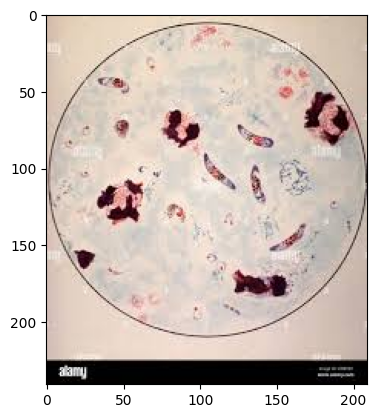

In [17]:
import cv2
img = cv2.imread("test_image.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

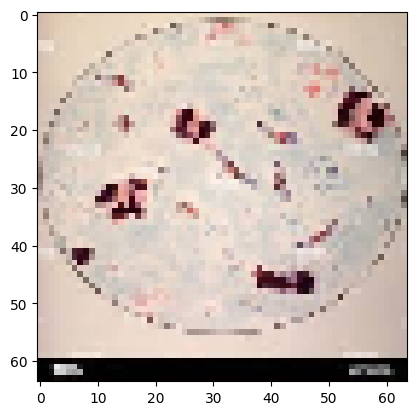

In [18]:
resize = cv2.resize(img, (64, 64))
plt.imshow(cv2.cvtColor(resize, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
y_pred = model.predict(np.expand_dims(resize/64, axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


np.float32(0.0)

In [22]:
if y_pred[0][0] > y_pred[0][1]:
    print("The image is a Parasitized cell")
elif y_pred[0][0] < y_pred[0][1]:
    print("The image is a Uninfected cell")

The image is a Parasitized cell
